#  Imports

In [89]:
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split

from matplotlib import pyplot
import random
import pandas as pd
import numpy as np

# Data Processing

In [90]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_valid, y_valid) = keras.datasets.mnist.load_data()
y_train_cp = y_train
y_valid_cp = y_valid

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_valid = x_valid.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_valid = np.expand_dims(x_valid, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_valid.shape[0], "validation samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 validation samples


## Additional Validation Data

In [91]:
_, x_train_subset, _, y_train_subset = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
print(x_train_subset.shape[0], "train_subset samples")

15000 train_subset samples


In [92]:
validationMasks = {}
for i in range(0,10):
    validationMasks[i] = y_valid_cp==i
randomDigit = random.choice(range(10))
print(randomDigit)
y_valid[validationMasks[randomDigit]][0:3]

1


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [93]:
x_valid.shape,len(x_valid)

((10000, 28, 28, 1), 10000)

Display a Random Image of  Random Degit 4  At a Random Index of  911


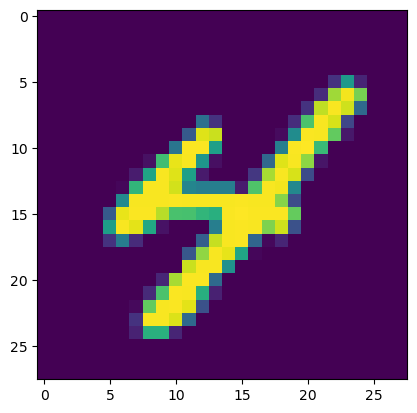

In [94]:

list1 = [1, 2, 3, 4, 5, 6]
displayNum = random.choice(range(10))

randomImage_index = random.choice(range(len(x_valid[validationMasks[displayNum]])))
print('Display a Random Image of  Random Degit',displayNum,' At a Random Index of ',randomImage_index)
#print()

imge_2 = x_valid[validationMasks[displayNum]][randomImage_index]
pyplot.imshow(imge_2)

In [95]:
## Image Generation For Train & Validation

In [96]:
datagen_train = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=False,
        fill_mode='nearest')

datagen_valid = ImageDataGenerator()

#datagen.fit(datagen_train)
datagenFlow_train = datagen_train.flow(x_train,y_train)

trainItem = datagenFlow_train.next()
trainItem
print(' datagen_train NextBatch , Batch Shape, X_Shape, Y_Shape',len(trainItem),(trainItem[0].shape),(trainItem[1].shape))

#Rest
datagenFlow_train = datagen_train.flow(x_train,y_train)
# Usual Validation 
datagenFlow_valid = datagen_train.flow(x_train_subset,y_train_subset)

 datagen_train NextBatch , Batch Shape, X_Shape, Y_Shape 2 (32, 28, 28, 1) (32, 10)


## Special Train & Valid Stratergy 

In [97]:

#Modified Train to Evaluate Over fitting
validationSets = {}

validationSets['train_sub'] = datagen_valid.flow(x_train_subset,y_train_subset)

# Specail Case Validation
#y_valid[validationMasks[randomDigit]]
validationSets['1'] = datagen_train.flow(x_valid[validationMasks[1]],y_valid[validationMasks[1]]) #Least confusing
validationSets['0'] = datagen_train.flow(x_valid[validationMasks[0]],y_valid[validationMasks[0]]) 
validationSets['6'] = datagen_train.flow(x_valid[validationMasks[6]],y_valid[validationMasks[6]])
validationSets['8'] = datagen_train.flow(x_valid[validationMasks[8]],y_valid[validationMasks[8]])


# Model

In [98]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

def getModel():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu', input_shape=(28,28,1), padding='same'))
    #model.add( Conv2D(32, (3, 3), input_shape=(3, 150, 150)),padding='same')
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3) , activation='relu' ))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

    model.summary()
    return model

# Usaul Model Training

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 activation_8 (Activation)   (None, 12, 12, 32)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1152)             

,loss,accuracy,val_loss,val_accuracy
0,0.696930,0.773750,0.219957,0.933667
1,0.326139,0.903500,0.168397,0.951800
2,0.263722,0.923033,0.165844,0.956533
3,0.263145,0.926667,0.165877,0.953200
4,0.268104,0.924217,0.146361,0.959200


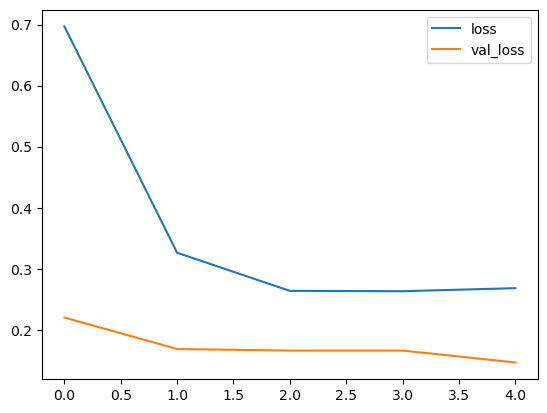

In [99]:

modelLog = getModel().fit(
        datagenFlow_train,validation_data=datagenFlow_valid,
        epochs=5)
historyDf = pd.DataFrame(modelLog.history)
historyDf[['loss','val_loss']].plot()
historyDf.head(5)

# Better way to compare model

In [100]:
class MultipleValidationCallBack(keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs=None):
        for thisValidationType in validationSets:
            #datagen = 
            thisLoss = self.model.evaluate(validationSets[thisValidationType])
            logs[thisValidationType+"_loss"] = thisLoss[0]
            logs[thisValidationType+"_acc"] = thisLoss[1]

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 12, 12, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1152)             

<Axes: >

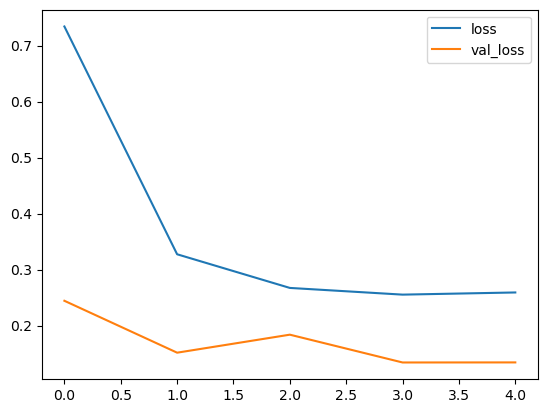

In [101]:
modelLog = getModel().fit(
        datagenFlow_train,validation_data=datagenFlow_valid,
        callbacks=[MultipleValidationCallBack()], #
        epochs=5)
historyDf_2 = pd.DataFrame(modelLog.history)
historyDf_2[['loss','val_loss']].plot()

In [102]:
historyDf_2.head(5)

,loss,accuracy,val_loss,val_accuracy,train_sub_loss,train_sub_acc,1_loss,1_acc,0_loss,0_acc,6_loss,6_acc,8_loss,8_acc
0,0.734230,0.762733,0.244217,0.923733,0.105695,0.969533,0.053088,0.988546,0.107909,0.972449,0.127815,0.962422,0.618769,0.806982
1,0.327300,0.901333,0.151499,0.953933,0.073221,0.977667,0.082589,0.977974,0.075586,0.976531,0.095006,0.973904,0.138229,0.971253
2,0.267182,0.922033,0.183671,0.943133,0.105585,0.969067,0.115748,0.969163,0.139109,0.958163,0.147612,0.943633,0.068374,0.984600
3,0.255210,0.929283,0.134004,0.960600,0.093505,0.977800,0.110455,0.975330,0.175837,0.946939,0.114048,0.959290,0.092303,0.976386
4,0.259074,0.927367,0.134127,0.963333,0.121602,0.976400,0.151802,0.966520,0.078488,0.978571,0.128376,0.950939,0.312727,0.933265


<Axes: >

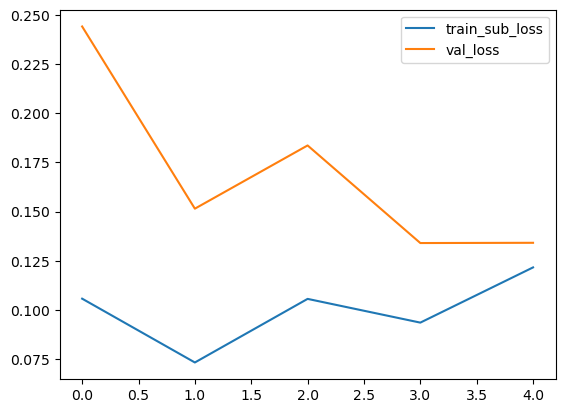

In [103]:
historyDf_2[['train_sub_loss','val_loss']].plot()

<Axes: >

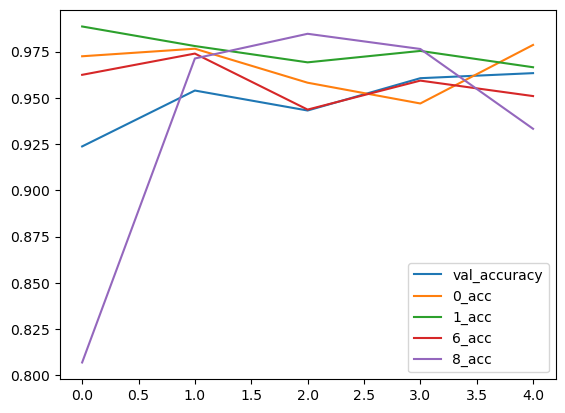

In [104]:
historyDf_2[['val_accuracy','0_acc','1_acc','6_acc','8_acc']].plot()